In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 100
X = np.linspace(-4,4,N)
Y = np.linspace(-5,5,N)
X,Y = np.meshgrid(X,Y)

In [3]:
mu = np.array([0,1])
Sigma = np.array([[1,-0.5],[-0.5,1.5]])

In [4]:
pos = np.empty(X.shape +(2,))
pos[:,:,0] = X
pos[:,:,1] = Y

In [5]:
def multivariate_gaussian(pos,mu,Sigma):
    n = mu.shape[0]
    sigma_det = np.linalg.det(Sigma)
    sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n*sigma_det)
    
    fac = np.einsum('...k,kl,...l->...',pos-mu,sigma_inv,pos-mu)
    
    return(np.exp(-fac/2)/N)

In [6]:
Z = multivariate_gaussian(pos,mu,Sigma)

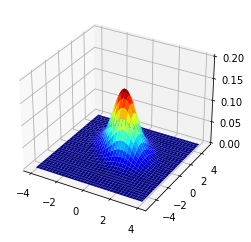

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z,rstride=3,cstride=3,linewidth=1,antialiased=True,cmap=cm.jet)
# cset = ax.contourf(X,Y,Z,zdir='z',offset=-0.15,cmap=cm.jet)
# ax.set_zlim(0,0)
ax.set_zticks(np.linspace(0,0.2,5))
# ax.view_init(27,-21)
plt.show()